# Setup

In [37]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [39]:
tb_filenames = os.listdir("data/")
result = []
for i in range(len(tb_filenames)):
    if tb_filenames[i][:3] != "hw3":
        continue
    tb_filenames[i] = "data/" + tb_filenames[i]
    tb_filenames[i] = tb_filenames[i] + "/" + [x for x in os.listdir(tb_filenames[i]) if x[:6] == "events"][0]
    result.append(tb_filenames[i])

tb_filenames = result
tb_filenames = np.array(tb_filenames)
pprint(tb_filenames)

array(['data/hw3_q4_10_10_CartPole-v0_20-10-2020_16-23-33/events.out.tfevents.1603236213.Aryans-MacBook-Pro.local',
       'data/hw3_q2_dqn_2_LunarLander-v3_19-10-2020_14-59-29/events.out.tfevents.1603144769.Aryans-MacBook-Pro.local',
       'data/hw3_q3_hparam2_LunarLander-v3_20-10-2020_02-42-25/events.out.tfevents.1603186945.Aryans-MacBook-Pro.local',
       'data/hw3_q4_100_1_CartPole-v0_20-10-2020_16-21-09/events.out.tfevents.1603236069.Aryans-MacBook-Pro.local',
       'data/hw3_q3_hparam1_LunarLander-v3_20-10-2020_02-14-31/events.out.tfevents.1603185271.Aryans-MacBook-Pro.local',
       'data/hw3_q4_1_100_CartPole-v0_20-10-2020_16-22-27/events.out.tfevents.1603236147.Aryans-MacBook-Pro.local',
       'data/hw3_q2_dqn_3_LunarLander-v3_19-10-2020_15-32-28/events.out.tfevents.1603146748.Aryans-MacBook-Pro.local',
       'data/hw3_q1_MsPacman-v0_19-10-2020_00-06-50/events.out.tfevents.1603091210.Aryans-MacBook-Pro.local',
       'data/hw3_q5_10_10_HalfCheetah-v2_20-10-2020_16-33-03/e

In [40]:
pprint(get_section_results(tb_filenames[0]).keys())

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])


In [41]:
pprint(get_section_results(tb_filenames[3]).keys())

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])


In [42]:
def plot_eval_return(filename, experiment_name = "", fmt = None):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Eval_AverageReturn']
    eval_std = data['Eval_StdReturn']
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Average Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Average Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()
    
def plot_train_return(filename, experiment_name = "", fmt = None, std = True):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Train_AverageReturn']
    if std:
        eval_std = data['Train_StdReturn']
    else:
        eval_std = np.zeros_like(eval_avg_return)
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Train Average Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Train Average Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()

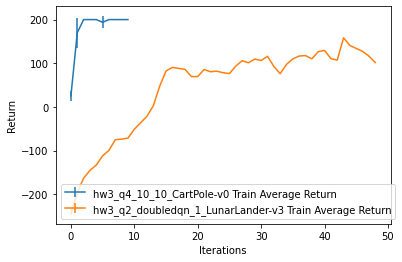

In [43]:
plot_train_return(tb_filenames[0])
plot_train_return(tb_filenames[-1], std=False)

# Question 1

In [44]:
q1_files = [name for name in tb_filenames if name[9:11] == "q1"]
q1_files

['data/hw3_q1_MsPacman-v0_19-10-2020_00-06-50/events.out.tfevents.1603091210.Aryans-MacBook-Pro.local']

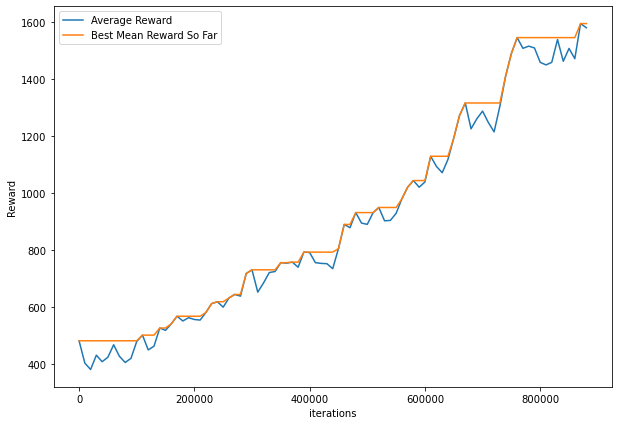

In [59]:
plt.figure(figsize=(10, 7))
filename = q1_files[0]
experiment_name = filename[5:]
experiment_name = experiment_name[:experiment_name.index("/")]
experiment_name = experiment_name[::-1]
experiment_name = experiment_name[experiment_name.index("_")+1:]
experiment_name = experiment_name[experiment_name.index("_")+1:]
experiment_name = experiment_name[::-1]
#print(experiment_name)
data = get_section_results(filename)
eval_avg_return = data['Train_AverageReturn']
best_mean_return = np.maximum.accumulate(eval_avg_return)

plt.plot(data["Train_EnvstepsSoFar"][:-1], eval_avg_return, label = "Average Reward")
plt.plot(data["Train_EnvstepsSoFar"][:-1], best_mean_return, label = "Best Mean Reward So Far")

plt.xlabel("iterations")
plt.ylabel("Reward")
plt.legend()

# Question 2

In [61]:
q2_files = sorted([name for name in tb_filenames if name[9:11] == "q2"])
q2_files

['data/hw3_q2_doubledqn_1_LunarLander-v3_19-10-2020_16-50-32/events.out.tfevents.1603151432.Aryans-MacBook-Pro.local',
 'data/hw3_q2_doubledqn_2_LunarLander-v3_19-10-2020_20-14-56/events.out.tfevents.1603163696.Aryans-MacBook-Pro.local',
 'data/hw3_q2_doubledqn_3_LunarLander-v3_19-10-2020_21-10-33/events.out.tfevents.1603167033.Aryans-MacBook-Pro.local',
 'data/hw3_q2_dqn_1_LunarLander-v3_19-10-2020_14-37-33/events.out.tfevents.1603143453.Aryans-MacBook-Pro.local',
 'data/hw3_q2_dqn_2_LunarLander-v3_19-10-2020_14-59-29/events.out.tfevents.1603144769.Aryans-MacBook-Pro.local',
 'data/hw3_q2_dqn_3_LunarLander-v3_19-10-2020_15-32-28/events.out.tfevents.1603146748.Aryans-MacBook-Pro.local']

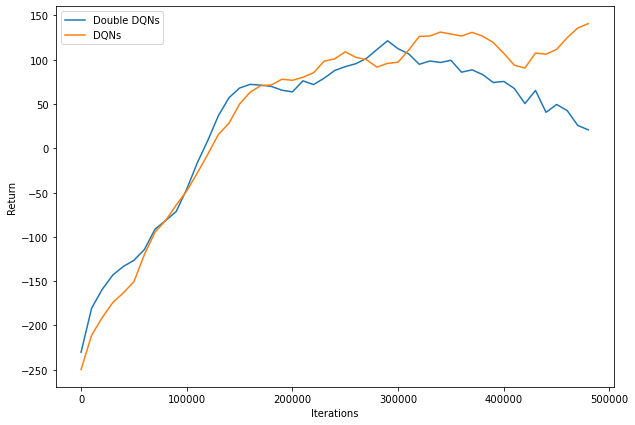

In [71]:
double_dqns = []
for i in range(3):
    filename = q2_files[i]
    experiment_name = filename[5:]
    experiment_name = experiment_name[:experiment_name.index("/")]
    experiment_name = experiment_name[::-1]
    experiment_name = experiment_name[experiment_name.index("_")+1:]
    experiment_name = experiment_name[experiment_name.index("_")+1:]
    experiment_name = experiment_name[::-1]
    data = get_section_results(filename)
    double_dqns.append(np.array(data['Train_AverageReturn']))

dqns = []
for i in range(3, 6):
    filename = q2_files[i]
    experiment_name = filename[5:]
    experiment_name = experiment_name[:experiment_name.index("/")]
    experiment_name = experiment_name[::-1]
    experiment_name = experiment_name[experiment_name.index("_")+1:]
    experiment_name = experiment_name[experiment_name.index("_")+1:]
    experiment_name = experiment_name[::-1]
    data = get_section_results(filename)
    dqns.append(np.array(data['Train_AverageReturn']))

double_dqns = sum(double_dqns)/3
dqns = sum(dqns)/3

plt.figure(figsize=(10, 7))

plt.plot(data["Train_EnvstepsSoFar"][:-1], double_dqns, label = "Double DQNs")
plt.plot(data["Train_EnvstepsSoFar"][:-1], dqns, label = "DQNs")
plt.ylabel("Return")
plt.xlabel("Iterations")
plt.legend()